In [365]:
#Imports

In [2]:
# pandas and numpy
import pandas as pd
import numpy as np

#scikit-learn (ML), seaborn, matplotlib
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score #Importing cross_val_score for evaluating model performance using cross-validation
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier

In [432]:
#IPython, graphviz
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [433]:
from IPython.display import HTML
style = "<style>svg{width:10% !important;height:10% !important;}</style>"
HTML(style)

In [464]:
#get csv files as a DataFrame
titanic_data = pd.read_csv('/Users/ainurkhussainova/Downloads/titanic/train.csv')

In [465]:
#preview the data
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [466]:
#get null data
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [467]:
#Selecting feature columns X and the target variable y from the dataset
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = titanic_data.Survived

In [468]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [469]:
# Shows rows with NaN
print(X[X.isna().any(axis=1)])  

     Pclass     Sex  Age  SibSp  Parch     Fare Embarked
5         3    male  NaN      0      0   8.4583        Q
17        2    male  NaN      0      0  13.0000        S
19        3  female  NaN      0      0   7.2250        C
26        3    male  NaN      0      0   7.2250        C
28        3  female  NaN      0      0   7.8792        Q
..      ...     ...  ...    ...    ...      ...      ...
859       3    male  NaN      0      0   7.2292        C
863       3  female  NaN      8      2  69.5500        S
868       3    male  NaN      0      0   9.5000        S
878       3    male  NaN      0      0   7.8958        S
888       3  female  NaN      1      2  23.4500        S

[179 rows x 7 columns]


In [470]:
# Converting categorical variables into dummy/indicator variables
X = pd.get_dummies(X).fillna({'Age' : X.Age.median()}).astype(int)

In [471]:
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [472]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22,1,0,7,0,1,0,0,1
1,1,38,1,0,71,1,0,1,0,0
2,3,26,0,0,7,1,0,0,0,1
3,1,35,1,0,53,1,0,0,0,1
4,3,35,0,0,8,0,1,0,0,1


In [473]:
# Creating a Decision Tree Classifier with entropy as the criterion for splitting
clf=tree.DecisionTreeClassifier(criterion='entropy')

In [474]:
# Training the Decision Tree Classifier using feature matrix X and target variable y
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

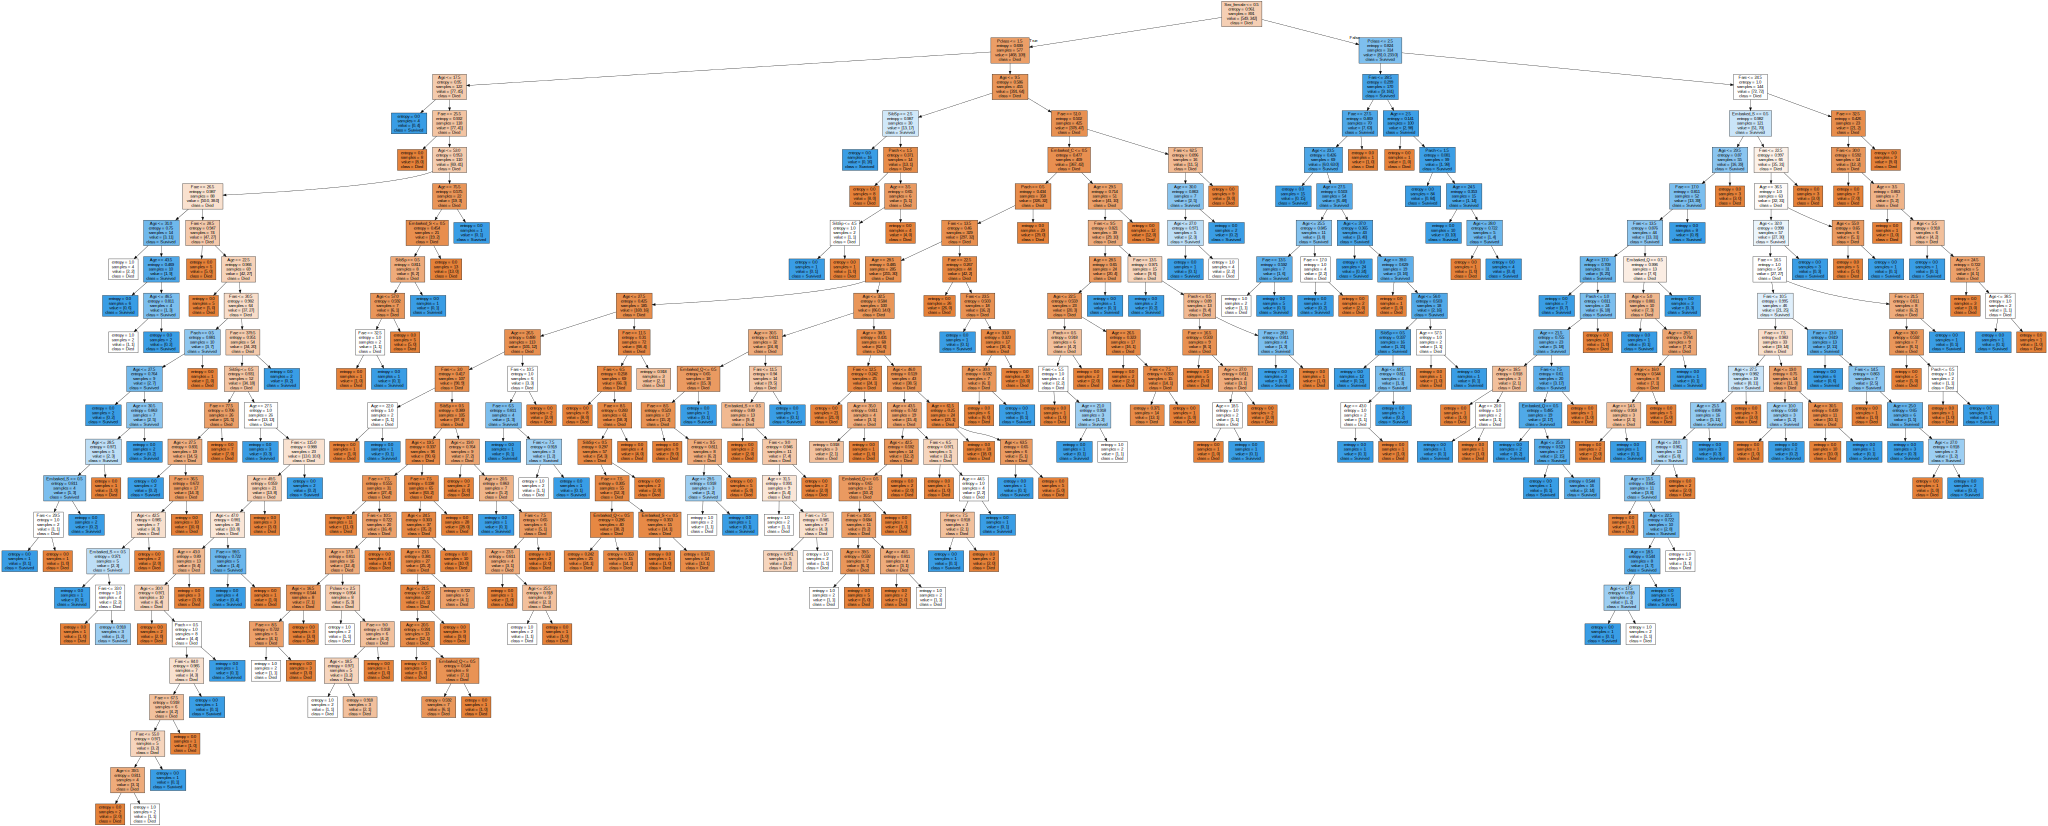

In [475]:
# Create a Graphviz representation of the trained Decision Tree
graph = Source(tree.export_graphviz(clf, out_file=None,
                                   feature_names=list(X), # Use feature names from X
                                   class_names=['Died','Survived'], # Define class labels
                                   filled = True)) # Color nodes based on class distribution

# Render and display the Decision Tree as an SVG image
display(SVG(graph.pipe(format='svg')))

In [477]:
#split DF to train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) 

In [383]:
X_train.shape

(596, 10)

In [384]:
X_test.shape

(295, 10)

In [478]:
clf.score(X, y)

0.9618406285072951

In [479]:
clf.fit(X_train, y_train) 

DecisionTreeClassifier(criterion='entropy')

In [480]:
clf.score(X_train, y_train) 

0.9630872483221476

In [481]:
clf.score(X_test, y_test) 

0.7694915254237288

In [482]:
# Creating a Decision Tree Classifier with entropy and depth as the criterion for splitting 
# The 'max_depth' parameter controls the maximum depth of the tree to prevent overfitting (переобучение)
clf=tree.DecisionTreeClassifier(criterion='entropy', max_depth= 3)

In [483]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [484]:
clf.score(X_train, y_train)

0.8221476510067114

In [485]:
clf.score(X_test, y_test)

0.8203389830508474

In [486]:
max_depth_values = range(1, 100)

In [487]:
# Initialize an empty DataFrame before the loop
scores_data = pd.DataFrame()

In [488]:
# Подбираем вручную параметры, ниже разберем автоматическую подборку через метод GridSearchCV

# Loop through different values of max_depth for Decision Tree
for max_depth in max_depth_values:

    # Initialize a Decision Tree classifier with entropy as the criterion
    clf=tree.DecisionTreeClassifier(criterion='entropy', max_depth= max_depth)
    
    # Train the classifier on the training data
    clf.fit(X_train, y_train)
    
    # Compute the accuracy on the training set 
    train_score = clf.score(X_train, y_train)

    # Compute the accuracy on the test set
    test_score = clf.score(X_test, y_test)

    # Perform 5-fold cross-validation and compute the mean score
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()

    # Create a temporary DataFrame to store scores for the current max_depth
    temp_score_data = pd.DataFrame({'max_depth' : [max_depth], 
                                    'train_score' : [train_score], 
                                    'test_score' : [test_score],
                                    'cross_val_score' : [mean_cross_val_score]})

    # Append the results to scores_data DataFrame
    scores_data = pd.concat([scores_data, temp_score_data], ignore_index=True)

In [489]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
1,2,0.805369,0.776271,0.775238
2,3,0.822148,0.820339,0.798725
3,4,0.835570,0.823729,0.810434
4,5,0.845638,0.806780,0.786947


In [397]:
# switch DF into format where one or more columns are identifier variables while all other columns considered measured columns
# var_name (вид ключа)

In [490]:
scores_data_long = pd.melt(scores_data, id_vars = ['max_depth'], 
                           value_vars = ['train_score', 'test_score', 'cross_val_score'], 
                          var_name = 'set_type', value_name='score')

In [491]:
scores_data_long.query("set_type == 'cross_val_score'").head(20)

,max_depth,set_type,score
198,1,cross_val_score,0.781961
199,2,cross_val_score,0.775238
200,3,cross_val_score,0.798725
201,4,cross_val_score,0.810434
202,5,cross_val_score,0.786947
203,6,cross_val_score,0.795350
204,7,cross_val_score,0.780238
205,8,cross_val_score,0.791961
206,9,cross_val_score,0.786933
207,10,cross_val_score,0.795308


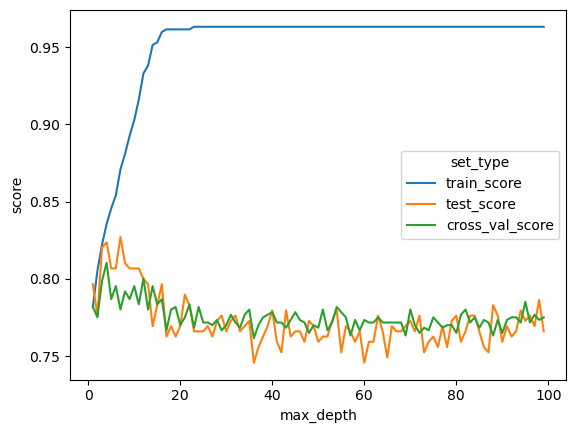

In [492]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)
plt.show()

In [494]:
# 
best_clf=tree.DecisionTreeClassifier(criterion='entropy', max_depth= 10)

In [495]:
# Perform 5-fold cross-validation and compute the mean score
cross_val_score(clf, X_train, y_train, cv=5).mean()

np.float64(0.7701260504201681)

In [496]:
# Final evaluation of the model 'best_clf' using 5-fold cross-validation on the test data
cross_val_score(clf, X_test, y_test, cv=5).mean()

np.float64(0.7830508474576272)

In [405]:
#Task

In [406]:
df_train = pd.read_csv('/Users/ainurkhussainova/Downloads/train_iris.csv', index_col=0)

In [407]:
df_test = pd.read_csv('/Users/ainurkhussainova/Downloads/test_iris.csv', index_col=0)

In [408]:
df_test.head()

,sepal length,sepal width,petal length,petal width,species
114,5.8,2.8,5.1,2.4,2
70,5.9,3.2,4.8,1.8,1
138,6.0,3.0,4.8,1.8,2
59,5.2,2.7,3.9,1.4,1
44,5.1,3.8,1.9,0.4,0


In [409]:
df_train.head()

,sepal length,sepal width,petal length,petal width,species
130,7.4,2.8,6.1,1.9,2
7,5.0,3.4,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
142,5.8,2.7,5.1,1.9,2
109,7.2,3.6,6.1,2.5,2


In [410]:
#Selecting feature columns X and the target variable y from the dataset
X_train = df_train.drop(['species'], axis=1)
X_test = df_test.drop(['species'], axis=1)
y_train = df_train.species
y_test = df_test.species

In [411]:
rs = np.random.seed(0)

In [412]:
scores_data = pd.DataFrame()

In [413]:
max_depth_values = range(1, 100)

In [414]:
# Loop through different values of max_depth for Decision Tree
for max_depth in max_depth_values:

    # Initialize a Decision Tree classifier with entropy as the criterion
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=rs)
    
    # Train the classifier on the training data
    clf.fit(X_train, y_train)
    
    # Compute the accuracy on the training set 
    train_score = clf.score(X_train, y_train)

    # Compute the accuracy on the test set
    test_score = clf.score(X_test, y_test)

    # Create a temporary DataFrame to store scores for the current max_depth
    temp_score_data = pd.DataFrame({'max_depth' : [max_depth], 
                                    'train_score' : [train_score], 
                                    'test_score' : [test_score]})

    # Append the results to scores_data DataFrame
    scores_data = pd.concat([scores_data, temp_score_data], ignore_index=True)

In [415]:
scores_data.head()

,max_depth,train_score,test_score
0,1,0.70,0.60
1,2,0.97,0.94
2,3,0.99,0.94
3,4,1.00,0.92
4,5,1.00,0.92


In [416]:
scores_data_long = pd.melt(scores_data, id_vars = ['max_depth'], 
                           value_vars = ['train_score', 'test_score'], 
                          var_name = 'set_type', value_name='score')

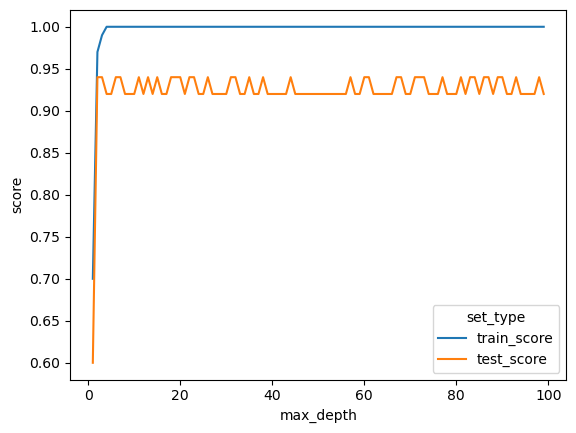

In [417]:
sns.lineplot(data=scores_data_long, x='max_depth', y='score', hue='set_type')
plt.show()

In [418]:
# task выше перебил знаяения x, y. Они не связаны с общим проектом

In [497]:
clf = tree.DecisionTreeClassifier()

In [498]:
parametrs = {'criterion' : ['gini', 'entropy'], 'max_depth' : range(1, 30)}

In [499]:
#estimator = clf, param_grid = parametrs, 
grid_search_cv_clf = GridSearchCV(clf, parametrs, cv=5) 

In [500]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [423]:
# кросс-валидация разбивает выборку всегда по-разному. 
# Можно всегда инциализировать seed для генератора случайных чисел одним и тем же числом перед каждым вызовом метода fit, 
# чтобы результат не менялся:
# np.random.seed(5)
# grid_search_cv_clf.fit(X, y)

In [501]:
#выбрать такие параметры, для которых значения accuracy будет максимальным
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 4}

In [502]:
best_clf = grid_search_cv_clf.best_estimator_

In [503]:
best_clf

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [504]:
best_clf.score(X_test, y_test)

0.823728813559322

In [506]:
y_pred = best_clf.predict(X_test)

In [507]:
# y_true = y_test
# y_pred = best_clf.predict()
precision_score(y_test, y_pred)

0.84

In [508]:
recall_score(y_test, y_pred)

0.7

In [509]:
y_pred #просто класс 0 и 1

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0])

In [510]:
y_predicted_prob = best_clf.predict_proba(X_test)

In [511]:
y_predicted_prob #сама вероятность отнесения к отриц и полож классу

array([[0.86363636, 0.13636364],
       [0.86363636, 0.13636364],
       [0.86363636, 0.13636364],
       [0.        , 1.        ],
       [0.42307692, 0.57692308],
       [0.04225352, 0.95774648],
       [0.42307692, 0.57692308],
       [0.86363636, 0.13636364],
       [0.42307692, 0.57692308],
       [0.        , 1.        ],
       [0.7027027 , 0.2972973 ],
       [0.86363636, 0.13636364],
       [1.        , 0.        ],
       [0.86363636, 0.13636364],
       [0.86363636, 0.13636364],
       [0.        , 1.        ],
       [0.7027027 , 0.2972973 ],
       [0.42307692, 0.57692308],
       [0.86363636, 0.13636364],
       [0.7027027 , 0.2972973 ],
       [0.86363636, 0.13636364],
       [0.7027027 , 0.2972973 ],
       [0.42307692, 0.57692308],
       [0.86363636, 0.13636364],
       [0.86363636, 0.13636364],
       [1.        , 0.        ],
       [0.7027027 , 0.2972973 ],
       [0.86363636, 0.13636364],
       [1.        , 0.        ],
       [0.42307692, 0.57692308],
       [0.

In [512]:
# отберем только вторую колонку в данных, отнесение к полож классу
y_predicted_prob[:, 1]

array([0.13636364, 0.13636364, 0.13636364, 1.        , 0.57692308,
       0.95774648, 0.57692308, 0.13636364, 0.57692308, 1.        ,
       0.2972973 , 0.13636364, 0.        , 0.13636364, 0.13636364,
       1.        , 0.2972973 , 0.57692308, 0.13636364, 0.2972973 ,
       0.13636364, 0.2972973 , 0.57692308, 0.13636364, 0.13636364,
       0.        , 0.2972973 , 0.13636364, 0.        , 0.57692308,
       0.13636364, 0.57692308, 0.2972973 , 0.57692308, 0.13636364,
       0.13636364, 0.2972973 , 0.57692308, 0.95774648, 0.13636364,
       0.13636364, 0.13636364, 0.13636364, 0.13636364, 0.        ,
       0.13636364, 0.13636364, 0.13636364, 0.13636364, 0.2972973 ,
       0.57692308, 0.95774648, 0.13636364, 0.2972973 , 0.13636364,
       1.        , 0.13636364, 0.95774648, 0.95774648, 0.57692308,
       0.13636364, 1.        , 0.95774648, 0.2972973 , 0.13636364,
       0.95774648, 0.13636364, 0.13636364, 0.13636364, 0.95774648,
       0.95774648, 1.        , 0.2972973 , 0.95774648, 0.13636

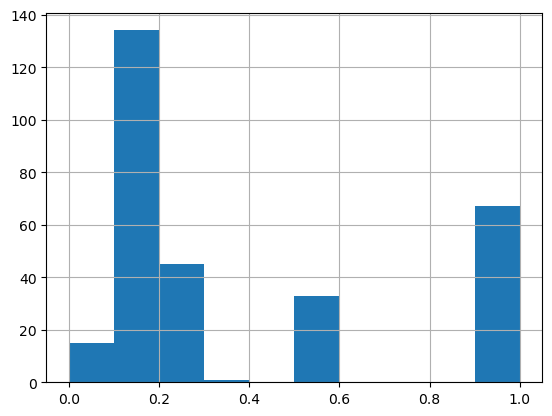

In [513]:
pd.Series(y_predicted_prob[:, 1]).hist()
plt.show()

In [514]:
# перекодировали что если больше 0.8, тогда класс 1, иначе 0
# получаетс яновый вектор
# перезаписываем y_pred
# считаем precision. Он стал намного больше, был 0.84. 
y_pred = np.where(y_predicted_prob[:, 1] > 0.9, 1, 0)

In [515]:
pd.Series(y_predicted_prob[:, 1]).unique()

array([0.13636364, 1.        , 0.57692308, 0.95774648, 0.2972973 ,
       0.        , 0.33333333])

In [516]:
precision_score(y_test, y_pred)

0.9104477611940298

In [517]:
# Высокий pr низкий Recall
recall_score(y_test, y_pred)

0.5083333333333333

In [518]:
# меняем порог отсечения на 0.2
y_pred = np.where(y_predicted_prob[:, 1] > 0.2, 1, 0)
precision_score(y_test, y_pred)

0.7123287671232876

In [519]:
# если еще см на Recall, то он высокий при низком Presicion
recall_score(y_test, y_pred)

0.8666666666666667

In [ ]:
# AUC_ROC (наверху импорт библиотеки)
# Финально хорошо бы визуализировать, какую отсечку лучше применить, чтобы нати баланс между Pr и Re

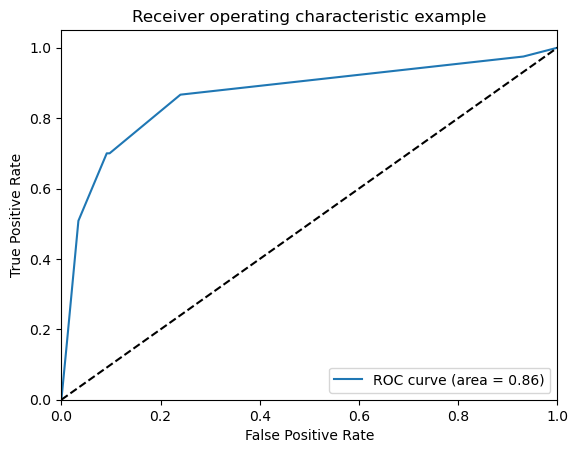

In [520]:
# TRP = Recall, 
# FPR = обратная величина, для какого % пассажиров с отриц классном мы лади неправиль ответ, как часто мы давали неправиль ответ, классифицировали пассажиров6 которые не выжили как выживших

fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:,1])
roc_auc= auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
"""MODULE_3: Random forest, Neural Network"""

In [532]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, n_jobs=-1,           # use all CPU cores
    verbose=1)

In [533]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=10,
                       min_samples_split=100)

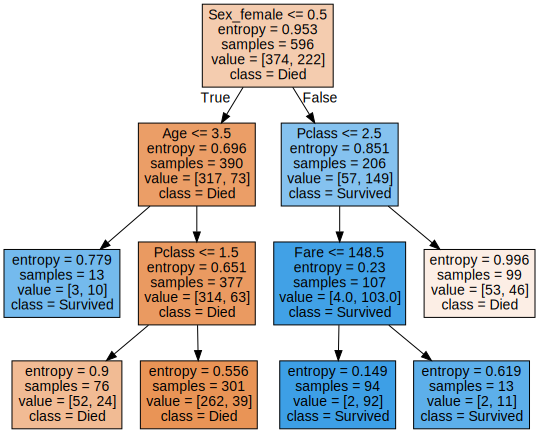

In [534]:
graph = Source(tree.export_graphviz(clf, out_file=None,
                                   feature_names=list(X), # Use feature names from X
                                   class_names=['Died','Survived'], # Define class labels
                                   filled = True)) # Color nodes based on class distribution

# Render and display the Decision Tree as an SVG image
display(SVG(graph.pipe(format='svg')))

In [ ]:
# 3.2 Random Forest

In [537]:
parametrs = {'n_estimators' : [10, 20, 30], 'max_depth' : [2, 5, 7, 10]}

In [536]:
clf_rf = RandomForestClassifier()

In [538]:
grid_search_cv_clf = GridSearchCV(clf_rf, parametrs, cv=5)

In [539]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 7, 10],
                         'n_estimators': [10, 20, 30]})

In [540]:
grid_search_cv_clf.best_params_

{'max_depth': 5, 'n_estimators': 10}

In [546]:
best_clf = grid_search_cv_clf.best_estimator_

In [548]:
best_clf.score(X_test, y_test)

0.8033898305084746

In [550]:
feature_importances = best_clf.feature_importances_

In [552]:
feature_importances_df = pd.DataFrame({'features' : list(X_train),
                                       'feature_importances' : feature_importances})

In [553]:
feature_importances_df

,features,feature_importances
0,Pclass,0.157472
1,Age,0.097727
2,SibSp,0.055950
3,Parch,0.024679
4,Fare,0.139995
5,Sex_female,0.129652
6,Sex_male,0.342295
7,Embarked_C,0.017003
8,Embarked_Q,0.018020
9,Embarked_S,0.017207


In [556]:
feature_importances_df.sort_values('feature_importances', ascending=False)

,features,feature_importances
6,Sex_male,0.342295
0,Pclass,0.157472
4,Fare,0.139995
5,Sex_female,0.129652
1,Age,0.097727
2,SibSp,0.055950
3,Parch,0.024679
8,Embarked_Q,0.018020
9,Embarked_S,0.017207
7,Embarked_C,0.017003


In [ ]:
# Разминочная задачка - создайте модель RandomForestClassifier с 15 деревьями и максимальной глубиной равной 5 уровням, поместите её в переменную rf. 
# Обучите модель на данных x_train и y_train, предскажите класс для наблюдений в x_test и поместите его в переменную predictions.

In [542]:
rf = RandomForestClassifier(n_estimators = 15, max_depth=5)

In [545]:
# rf.fit(X_train, y_train)

In [ ]:
# predictions = rf.predict(x_test)

In [ ]:
# так тоже работает
# predictions = rf.fit(x_train, y_train).predict(x_test)

Воспользуемся данными о сердечных заболеваниях и обучим на них Random Forest. Постройте график важности переменных для классификации и выберите среди предложенных вариантов наиболее похожий.

В задании присутствует рандом, прогоните обучение случайного леса и построение графика несколько раз, чтобы увидеть изменения в важности фичей (5 самых важных обычно присутствуют в топе, просто в разном порядке).
Чтобы получить такой же график, как в правильном варианте ответа, сделайте

In [560]:
data = pd.read_csv('https://raw.githubusercontent.com/sanyathisside/Predicting-Heart-Disease-using-Machine-Learning/master/heart-disease.csv')

In [564]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [591]:
# Создание выборок
X = data.drop(['target'], axis=1)
y = data['target']

In [592]:
# было в условии
rs = np.random.seed(0)

In [593]:
rf = RandomForestClassifier(10, max_depth=5)

In [594]:
rf.fit(X, y)

RandomForestClassifier(max_depth=5, n_estimators=10)

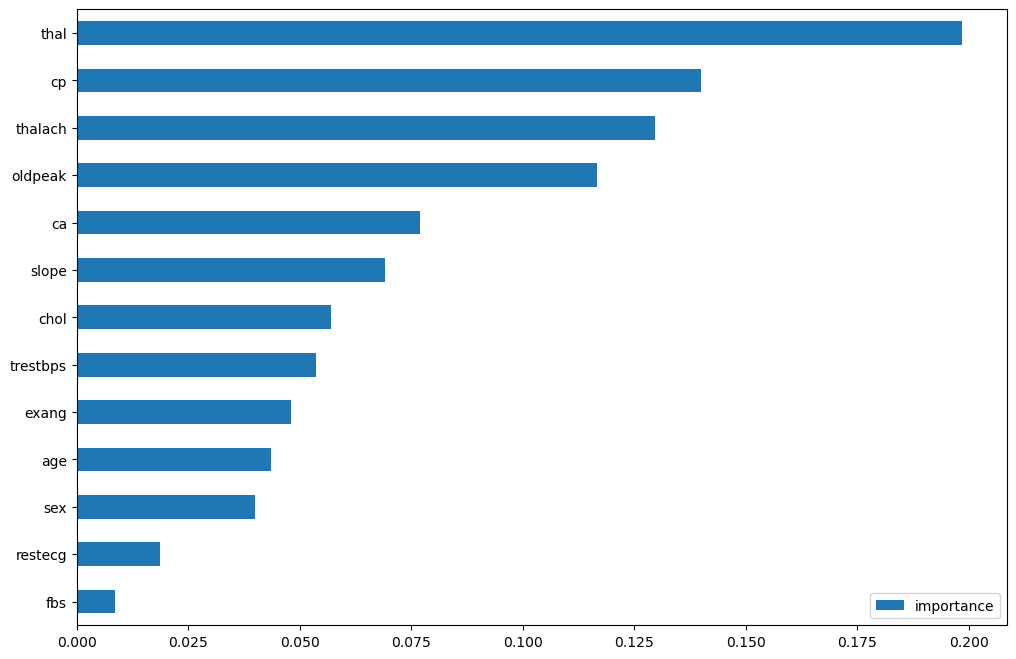

In [595]:
# было в условии
imp = pd.DataFrame(rf.feature_importances_, index = X_heart_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))
plt.show()